<h2>Data Visualization of Geospatial Data</h2><br>
Dataset used <a href="https://www.kaggle.com/datasets/vanvalkenberg/historicalweatherdataforindiancities">click here</a>

In [1]:
#importing the necessary python modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#reading the csv dataset files

bang = pd.read_csv('Temperature_And_Precipitation_Cities_IN/Bangalore_1990_2022_BangaloreCity.csv')

delhi = pd.read_csv('Temperature_And_Precipitation_Cities_IN/Delhi_NCR_1990_2022_Safdarjung.csv')

luck = pd.read_csv('Temperature_And_Precipitation_Cities_IN/Lucknow_1990_2022.csv')

chennai = pd.read_csv('Temperature_And_Precipitation_Cities_IN/Chennai_1990_2022_Madras.csv')

mumbai = pd.read_csv('Temperature_And_Precipitation_Cities_IN/Mumbai_1990_2022_Santacruz.csv')

rajasthan = pd.read_csv('Temperature_And_Precipitation_Cities_IN/Rajasthan_1990_2022_Jodhpur.csv')

In [7]:
#the stats of Bangalore City

bang

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5
11890,22-07-2022,23.2,21.1,27.9,0.0
11891,23-07-2022,23.1,20.9,26.7,0.0
11892,24-07-2022,22.8,20.0,26.7,0.3


In [10]:
#removing rows with null data

bang = bang.dropna()

delhi = delhi.dropna()

luck = luck.dropna()

chennai = chennai.dropna()

mumbai = mumbai.dropna()

rajasthan = rajasthan.dropna()

In [11]:
#stats of Bangalore without null data rows

bang

,time,tavg,tmin,tmax,prcp
2,03-01-1990,21.0,16.4,26.5,0.0
4,05-01-1990,20.4,14.2,26.1,0.0
7,08-01-1990,20.0,16.6,25.1,0.0
9,10-01-1990,21.2,15.0,27.7,0.0
10,11-01-1990,21.8,16.0,28.5,0.0
...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5
11890,22-07-2022,23.2,21.1,27.9,0.0
11891,23-07-2022,23.1,20.9,26.7,0.0
11892,24-07-2022,22.8,20.0,26.7,0.3


In [12]:
#adding the city name coloumn to the dataset

for nm,df in zip(['Bangalore','Delhi','Lucknow','Chennai','Mumbai','Rajasthan'],[bang,delhi,luck,chennai,mumbai,rajasthan]):
    df['location'] = nm

In [13]:
bang

,time,tavg,tmin,tmax,prcp,location
2,03-01-1990,21.0,16.4,26.5,0.0,Bangalore
4,05-01-1990,20.4,14.2,26.1,0.0,Bangalore
7,08-01-1990,20.0,16.6,25.1,0.0,Bangalore
9,10-01-1990,21.2,15.0,27.7,0.0,Bangalore
10,11-01-1990,21.8,16.0,28.5,0.0,Bangalore
...,...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5,Bangalore
11890,22-07-2022,23.2,21.1,27.9,0.0,Bangalore
11891,23-07-2022,23.1,20.9,26.7,0.0,Bangalore
11892,24-07-2022,22.8,20.0,26.7,0.3,Bangalore


In [14]:
#merging all the dataframes

dfs = [bang, delhi, luck, chennai, mumbai, rajasthan]
mdf = pd.concat(dfs)

In [15]:
mdf

,time,tavg,tmin,tmax,prcp,location
2,03-01-1990,21.0,16.4,26.5,0.0,Bangalore
4,05-01-1990,20.4,14.2,26.1,0.0,Bangalore
7,08-01-1990,20.0,16.6,25.1,0.0,Bangalore
9,10-01-1990,21.2,15.0,27.7,0.0,Bangalore
10,11-01-1990,21.8,16.0,28.5,0.0,Bangalore
...,...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5,Rajasthan
11890,22-07-2022,23.2,21.1,27.9,0.0,Rajasthan
11891,23-07-2022,23.1,20.9,26.7,0.0,Rajasthan
11892,24-07-2022,22.8,20.0,26.7,0.3,Rajasthan


In [16]:
#the max temp of the cities with their dates

ctsmxtmp = mdf.groupby('location').apply(lambda x:x['tmax'].loc[x['tmax'].idxmax()]).reset_index(name = 'MaxTmpRecorded')
ctsmxtmpdt = mdf.groupby('location').apply(lambda x:x['time'].loc[x['tmax'].idxmax()]).reset_index(name = 'MaxTmpDate')
ctsmxtmpdt = pd.merge(ctsmxtmp,ctsmxtmpdt,on = 'location',how = 'inner').sort_values('MaxTmpDate')

In [17]:
ctsmxtmpdt

,location,MaxTmpRecorded,MaxTmpDate
3,Lucknow,47.3,15-06-1995
1,Chennai,44.3,22-05-2003
0,Bangalore,38.5,25-10-1994
5,Rajasthan,38.5,25-10-1994
4,Mumbai,41.0,27-03-2021
2,Delhi,46.5,28-05-1998


In [18]:
#the min temp of the cities with their dates

ctsmintmp = mdf.groupby('location').apply(lambda x:x['tmin'].loc[x['tmin'].idxmin()]).reset_index(name = 'MinTmpRecorded')
ctsmintmpdt = mdf.groupby('location').apply(lambda x:x['time'].loc[x['tmin'].idxmin()]).reset_index(name = 'MinTmpDate')
ctsmintmpdt = pd.merge(ctsmintmp,ctsmintmpdt,on = 'location',how = 'inner').sort_values('MinTmpDate')

In [27]:
ctsmintmpdt

,location,MinTmpRecorded,MinTmpDate
4,Mumbai,10.0,03-01-1991
1,Chennai,12.0,07-01-2002
2,Delhi,0.1,07-06-2003
0,Bangalore,9.3,15-08-1992
5,Rajasthan,9.3,15-08-1992
3,Lucknow,1.0,28-01-1997


In [20]:
#the average temp of the cities through the years

AvgTemp = mdf.groupby('location')['tavg'].mean().reset_index(name = 'AvgTemp')

In [30]:
AvgTemp

,location,AvgTemp
0,Bangalore,23.755893
1,Chennai,28.319058
2,Delhi,25.403851
3,Lucknow,26.109494
4,Mumbai,27.674475
5,Rajasthan,23.755893


<AxesSubplot:title={'center':'Average Temps of different Cities'}, xlabel='Cities', ylabel='Degree Celcius'>

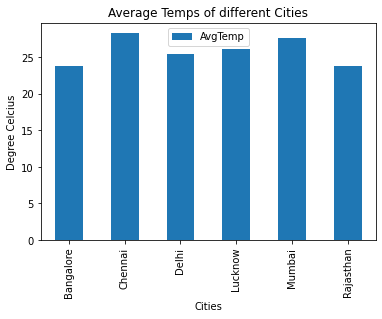

In [78]:
#plotting the average temps

AvgTemp.plot(x="location", y="AvgTemp", kind="bar",xlabel="Cities", ylabel="Degree Celcius", title="Average Temps of different Cities")

<AxesSubplot:title={'center':'Stats of Bangalore'}, xlabel='Years', ylabel='Degree Celcius/Centimeters'>

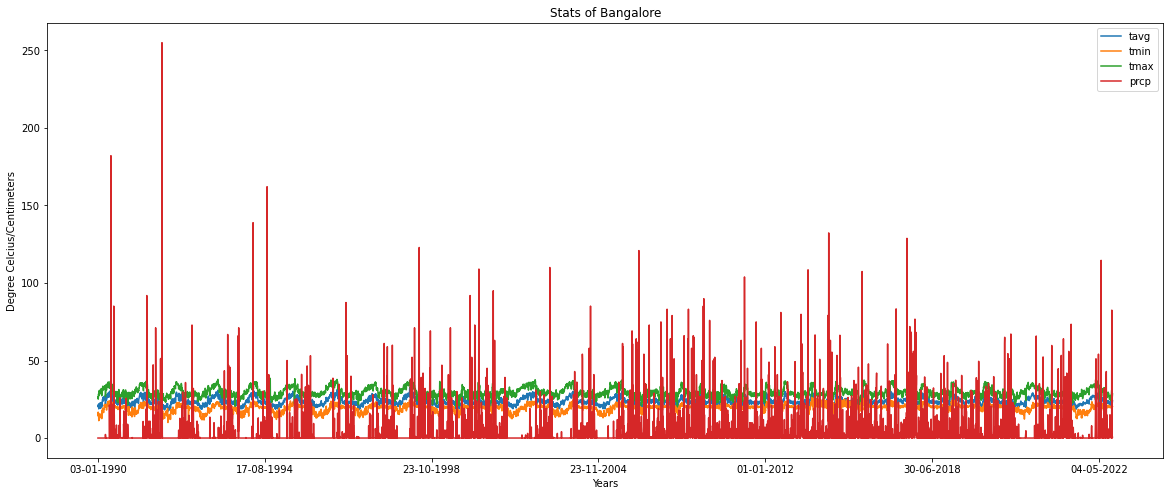

In [79]:
#plotting the statistics of the city of Bangalore

bang.plot(x="time",figsize=(20,8),xlabel="Years", ylabel="Degree Celcius/Centimeters", title="Stats of Bangalore")

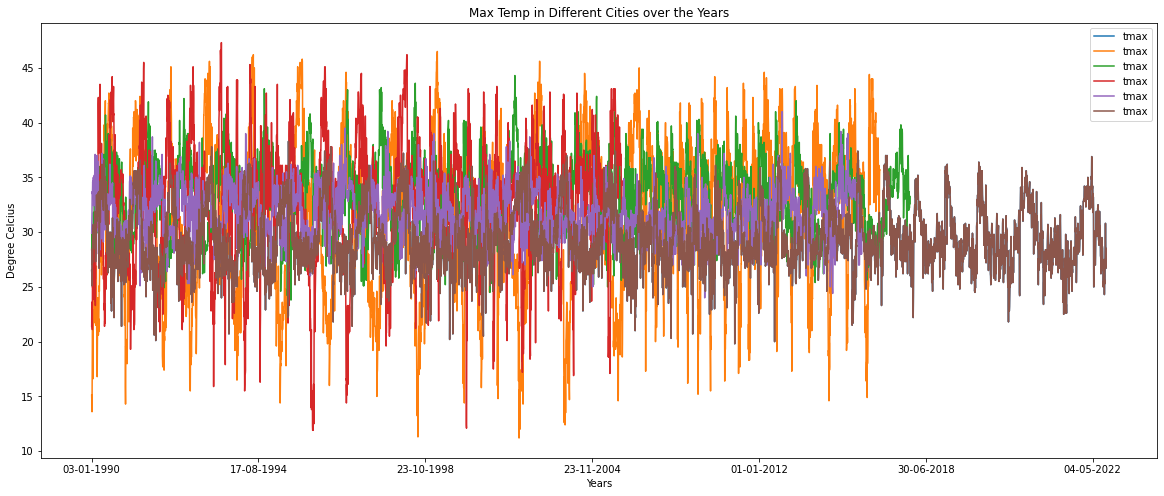

In [76]:
#plotting the statistics of all the cities simultaneously

ax = bang.plot(x="time", y="tmax")
ax = delhi.plot(x="time", y="tmax", ax=ax)
ax = chennai.plot(x="time", y="tmax", ax=ax)
ax = luck.plot(x="time", y="tmax", ax=ax)
ax = mumbai.plot(x="time", y="tmax", ax=ax)
ax = rajasthan.plot(x="time", y="tmax", ax=ax, figsize=(20,8), xlabel="Years", ylabel="Degree Celcius", title="Max Temp in Different Cities over the Years")
plt.show()

<i>Written by Ankit Rana</i><br>
<a href="https://github.com/Ankit161001">GitHub</a>